Preguntas
se debe normalizar?

Preprocesamiento de datos

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_name = 'datasets\hotel_bookings.csv'
df = pd.read_csv(file_name)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
df.shape

(119390, 32)

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


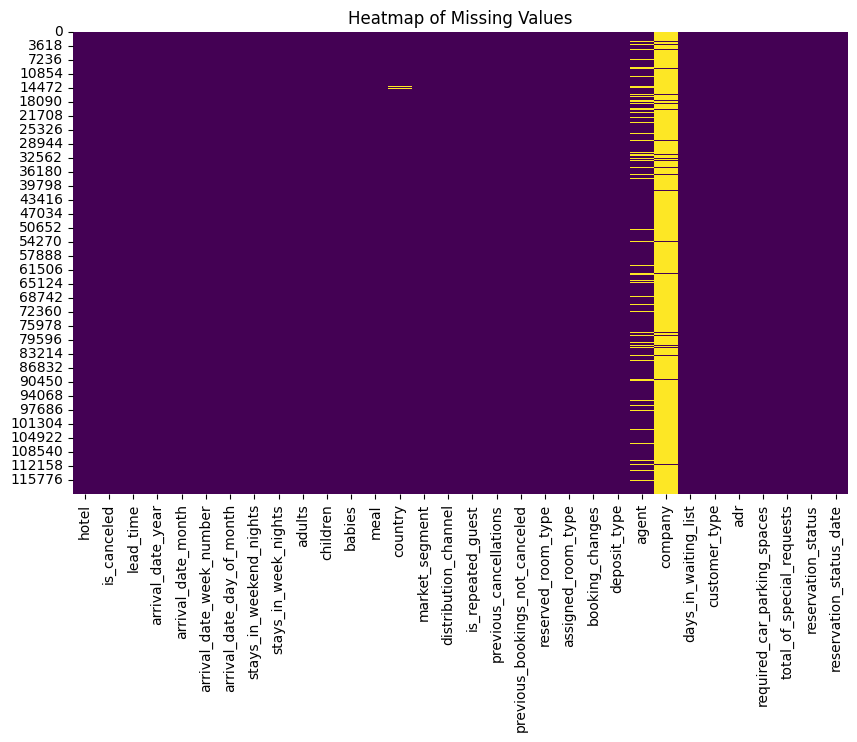

In [8]:
# Create a boolean mask where True indicates NaN values
null_mask = df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(null_mask, cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [29]:
# Calculate the number of missing values
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame to hold both counts and percentages
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percentage
})

# Filter to show only columns with more than 1% missing values
missing_summary_filtered = missing_summary[missing_summary['Percentage'] > 0]

# Calculate totals
total_missing = missing_summary['Missing Values'].sum()
total_percentage = 0

# Add totals to the filtered summary
missing_summary_filtered.loc['Total'] = [total_missing,0]

# Print the summary table
print(missing_summary_filtered)


          Missing Values  Percentage
children               4    0.003350
country              488    0.408744
agent              16340   13.686238
company           112593   94.306893
Total             129425    0.000000


C:\Users\marir\AppData\Local\Temp\ipykernel_2896\3588148369.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_summary_filtered.loc['Total'] = [total_missing,0]


En el mapa de calor se puede evidenciar que las columnas agent y company estan relacionadas. Pues las filas que tienen un valor para agent no tienen un valor para company y viceversa. 

In [13]:
# Filter rows where agent has a value and company has no value
subset = df[(df['agent'].notnull()) & (df['company'].isnull())]
print(f"Number of such rows: {len(subset)}")


Number of such rows: 102833
